In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances 
%matplotlib inline

In [2]:
import numpy as np
threshold_troppo = pd.read_csv(
    'Desai-GTEx/HumanGEM_Desai-GTEx_fastcore_local2_1_3_2.csv',
    index_col=0)

thresholded_genes = pd.DataFrame(data=np.where(threshold_troppo > 0, 1, 0),
                                          index=threshold_troppo.index,
                                          columns=threshold_troppo.columns)

thresholded_genes


,HMR_4097,HMR_4099,HMR_4108,HMR_4133,HMR_4137,HMR_4281,HMR_4388,HMR_4283,HMR_8357,HMR_4379,...,HMR_10119,HMR_10120,HMR_10121,HMR_10122,HMR_10125,HMR_10127,HMR_10128,HMR_10129,VBOF,EX_VBOF
Lung_Healthy,1,1,1,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,1
Lung_COVID19,1,1,1,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,1
Heart_Healthy,1,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
Heart_COVID19,1,1,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
Liver_Healthy,0,1,0,0,1,1,0,0,1,1,...,1,1,0,0,1,1,0,0,1,1
Liver_COVID19,1,0,1,1,1,0,0,0,1,1,...,1,1,0,0,1,1,0,0,1,1
Kidney_Healthy,0,1,0,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
Kidney_COVID19,0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
Intestine_Healthy,1,1,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
Intestine_COVID19,1,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1


In [3]:
dff = pd.DataFrame(data=1-pairwise_distances(thresholded_genes.to_numpy(), metric='jaccard'),
                   index=threshold_troppo.index,
                   columns=threshold_troppo.index)

dff

C:\Users\biosy\anaconda3\envs\4_ModelReconstruction\lib\site-packages\sklearn\metrics\pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


,Lung_Healthy,Lung_COVID19,Heart_Healthy,Heart_COVID19,Liver_Healthy,Liver_COVID19,Kidney_Healthy,Kidney_COVID19,Intestine_Healthy,Intestine_COVID19
Lung_Healthy,1.000000,0.883336,0.795016,0.813460,0.758967,0.655032,0.781538,0.565863,0.848775,0.835465
Lung_COVID19,0.883336,1.000000,0.777859,0.827599,0.733203,0.649736,0.757612,0.579501,0.823539,0.860957
Heart_Healthy,0.795016,0.777859,1.000000,0.786282,0.735974,0.628838,0.818777,0.590909,0.764459,0.778141
Heart_COVID19,0.813460,0.827599,0.786282,1.000000,0.707363,0.672414,0.719514,0.616505,0.764655,0.815746
Liver_Healthy,0.758967,0.733203,0.735974,0.707363,1.000000,0.722919,0.801674,0.532157,0.769281,0.734293
Liver_COVID19,0.655032,0.649736,0.628838,0.672414,0.722919,1.000000,0.643723,0.624017,0.664779,0.673353
Kidney_Healthy,0.781538,0.757612,0.818777,0.719514,0.801674,0.643723,1.000000,0.547905,0.789483,0.751017
Kidney_COVID19,0.565863,0.579501,0.590909,0.616505,0.532157,0.624017,0.547905,1.000000,0.551417,0.574480
Intestine_Healthy,0.848775,0.823539,0.764459,0.764655,0.769281,0.664779,0.789483,0.551417,1.000000,0.828181
Intestine_COVID19,0.835465,0.860957,0.778141,0.815746,0.734293,0.673353,0.751017,0.574480,0.828181,1.000000


In [4]:
dff.shape

(10, 10)

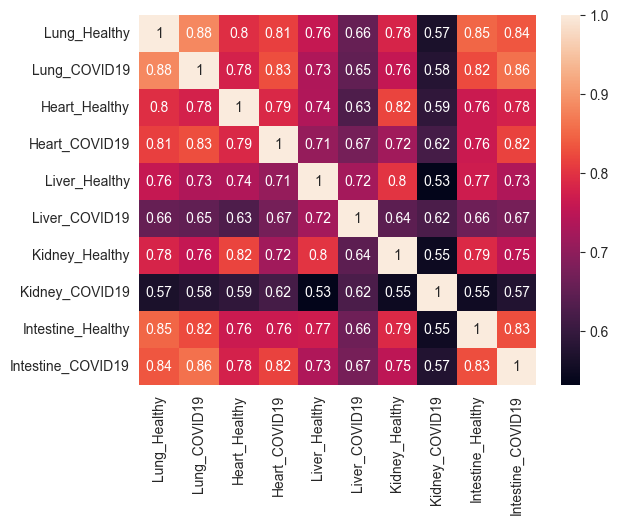

In [9]:
# calculate the distance based on jaccard similarity and subtract 1
# because a value of 1 in original means no similarity

# Generate the heatmap
heatmap = sns.heatmap(dff, annot=True)

# Save the heatmap
plt.savefig('Desai-GTEx/Heatmap_fastcore_local2_1_3_2.png')

In [7]:
thresholded_genes.to_csv('Desai-GTEx/JD_fastcore_local2_1_3_2.csv')